### Mason Manca
### CPSC 323
### Prof. Morehead
### 17 November 2022
# <center>Neural Network 2 </center>

In [9]:
# Cell for importing python modules/libraries
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pandas as pd
import numpy as np
import time as tm
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split


In [10]:
class Model():
    # Initializing variables
    def __init__(self):
        self.X_val = self.y_val = self.train_df = self.val_df = self.X_train = self.X_test = self.y_train = self.y_test = pd.DataFrame()
        self.X_rem = self.y_rem = pd.DataFrame()
        self.num_features = []
    
    def split_into_sets(self,df):

        self.train_df = df.sample(frac=0.75, random_state=4)
        self.val_df = df.drop(self.train_df.index)
        
        max_val = self.train_df.max(axis= 0)
        min_val = self.train_df.min(axis= 0)
 
        # Scaling our data so it is in the same range
        range = max_val - min_val
        self.train_df = (self.train_df - min_val)/(range)
 
        self.val_df =  (self.val_df- min_val)/range

        #Splitting the data into training, testing and validation data
        self.X_train, self.X_rem, self.y_train, self.y_rem = train_test_split(self.train_df.drop('Brain Weight(grams)',axis=1), self.train_df['Brain Weight(grams)'], test_size=0.2, random_state=4)
 
        self.X_test, self.X_val, self.y_test, self.y_val = train_test_split(self.X_rem, self.y_rem, test_size=0.5, random_state=4)
        

        
        self.num_features = [self.X_train.shape[1]]

        print(self.num_features)
    
    def validation(self, df, losses, sequentialModel):
        # Compute analytics
        size = len(df)
        num_batches = 35
        valid_loss, right = 0,0

        with torch.no_grad():
            for df['Head Size(cm^3)'] in range(0, size, num_batches):
                X_val, y_val = df['Head Size(cm^3)'].to(device), df['Brain Weight(grams)'].to(device)
                output = sequentialModel(X_val)
                valid_loss += loss_fn(output, y_val)
                right += (output.argmax(1) == y_val).type(torch.float).sum().item()

    def linearModel(self):
        model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=1,input_shape=self.num_features)])

    def createNetwork(self):
        sequentialModel = tf.keras.Sequential([
 
        tf.keras.layers.Dense(units=64, activation='relu', input_shape=self.num_features),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)])
        
        sequentialModel.compile(optimizer='adam',loss='mse',metrics=['mae','mse'])
        sequentialModel.summary()
        return sequentialModel

    def calculateLosses(self, sequentialModel):
        losses = sequentialModel.fit(self.X_train, self.y_train, 
        validation_data=(self.X_test, self.y_test),batch_size=35,epochs=20) # number of epochs

        sequentialModel.predict(self.X_test.iloc[0:3, :])
        return losses

    def plotting(self, losses):
        
        loss_df = pd.DataFrame(losses.history)
        loss_df.loc[:,['loss','val_loss']].plot()
        plt.title('Loss')

    def analysis(self,timeOfModel, sequentialModel):
        # Compute analytics
        y_pred = sequentialModel.predict(self.X_test)
        scores = sequentialModel.evaluate(self.X_test, self.y_test, verbose=0)
        pearson_val = float(pearsonr(self.y_test, y_pred)[0])
        
        # Print analytics
        print("Speed of Model (s): ", round(timeOfModel,4))
        print("Mean Absolute Error: ", round(scores[1],4))
        print("Mean Squared Error: ", round(scores[2],4))
        print("Pearson Correlation: ", round(pearson_val,4))    


In [11]:
# Cell for everything except methods and anaylytics 
Model = Model()

df = pd.read_csv('brain_weight.csv')

Model.split_into_sets(df)
Model.linearModel()
sequentialModel = Model.createNetwork()
t0 = tm.time()
losses = Model.calculateLosses(sequentialModel)
timeOfModel = tm.time() - t0

[3]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                256       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
5/5 [==============================] - 0s 23ms/step - loss: 0.1740 - mae: 0.3536 - mse: 0.1740 - val_loss: 0.0730 - val_mae: 0.2027 - val_mse: 0.0730
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0866 - mae: 0.2385 - mse: 0.0866 - val_loss: 0.0444 - val_mae: 0.1728 - val_mse

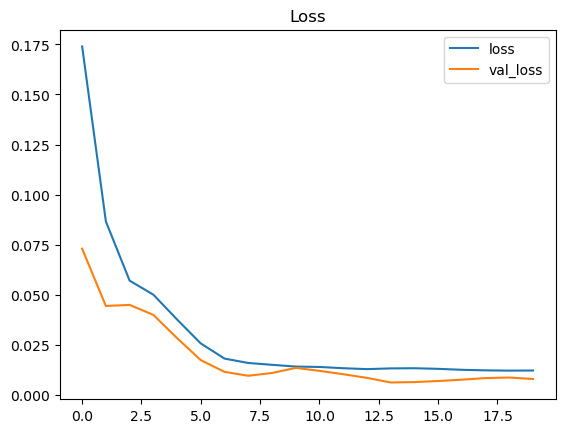

In [12]:
Model.plotting(losses)

In [13]:
Model.analysis(timeOfModel, sequentialModel)

1/1 [==============================] - 0s 19ms/step
Speed of Model (s):  0.8085
Mean Absolute Error:  0.0717
Mean Squared Error:  0.0079
Pearson Correlation:  0.8641


## Analysis:

##### MSE/MAE: As we can see, with a Mean Absolute Error of .086 and a Mean Squared error of .011 our model is very accurate with only 3 layers in the neural network.

##### Pearson Correlation (-1 < P_val > 1): Since we are using a regression based model, and not classification, I find it better to use a Pearson Correlation rather than accuracy. The Pearson Correlation measures a parametric correlation on a distribution of linear data. With a value of .876, our model is extremely good at predicting the weight of someone's brain.

### Note: My model in project 9 seems to be more accurate than this one with the same dataset, I am wondering if this could be attributed to having less data to train with. Perhaps validating the model comes at the expense of having a less trained model.